In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.read_csv("parking_data/train.csv")
test = pd.read_csv("parking_data/test.csv")
age_gender = pd.read_csv("parking_data/age_gender_info.csv")
data

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [7]:
age_gender

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
5,강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
6,광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,...,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
7,충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,...,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
8,부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,...,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028
9,제주특별자치도,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,...,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082


In [9]:
data.shape

(2952, 15)

In [10]:
test.shape

(1022, 14)

In [11]:
data.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [12]:
test.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수'],
      dtype='object')

### 데이터 설명

- 아파트 단지 내 필요한 주차대수는 ①법정주차대수 ②장래주차수요 중 큰 값에 따라 결정하게되어 있어, 정확한 ②장래주차수요의 산정을 필요로 합니다.
- 현재 ②장래주차수요는 ‘주차원단위’와 ‘건축연면적’을 기초로하여 산출되고 있으며, ‘주차원단위’는 신규 건축예정 부지 인근의 유사 단지를 피크 시간대 방문하여 주차된 차량대수를 세는 방법으로 조사하고 있습니다.
- 이 경우 인력조사로 인한 오차발생, 현장조사 시점과 실제 건축시점과의 시간차 등의 문제로 과대 또는 과소 산정의 가능성을 배제할 수 없습니다.

- `단지코드`: 아파트 단지 코드

### 단지코드

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
data.단지코드.value_counts()

C1439    48
C2132    47
C1859    40
C1790    33
C2597    32
         ..
C2651     2
C2437     1
C2340     1
C2188     1
C2520     1
Name: 단지코드, Length: 423, dtype: int64

- 연속형: 총세대수, 전용면적, 전용면적별세대수, 공가수, 임대보증금, 임대료, 도보 10분거리 내 지하철역 수(환승노선 수 반영), 도보 10분거리 내 버스정류장 수, 단지내주차면수
- 범주형: 임대건물구분, 지역, 공급유형, 자격유형
- 범주가 너무 많은 유형: 단지코드 

단지코드
C1000     7
C1004    19
C1005     3
C1013     5
C1014     7
         ..
C2663     6
C2666     6
C2670     5
C2680     3
C2692     5
Name: 단지코드, Length: 423, dtype: int64


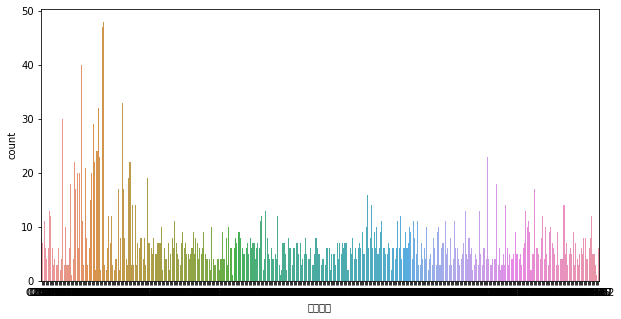

임대건물구분
상가      562
아파트    2390
Name: 임대건물구분, dtype: int64


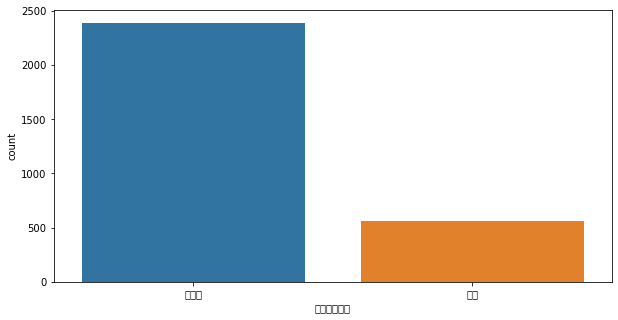

지역
강원도        187
경기도        621
경상남도       369
경상북도       119
광주광역시      141
대구광역시      102
대전광역시      266
부산광역시      328
서울특별시       64
세종특별자치시     47
울산광역시       36
전라남도       151
전라북도       109
제주특별자치도     91
충청남도       158
충청북도       163
Name: 지역, dtype: int64


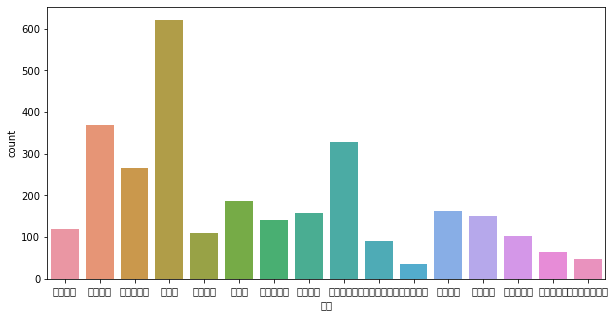

공급유형
공공분양            7
공공임대(10년)     205
공공임대(50년)      31
공공임대(5년)        3
공공임대(분납)       12
국민임대         1758
영구임대          152
임대상가          562
장기전세            9
행복주택          213
Name: 공급유형, dtype: int64


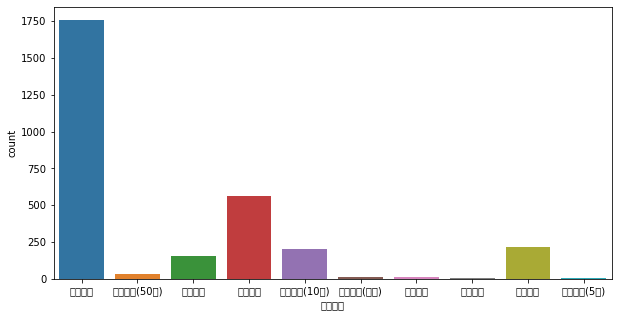

자격유형
A    1801
B      21
C      95
D     569
E      37
F       3
G       9
H     155
I      49
J     114
K      33
L      33
M       2
N      30
O       1
Name: 자격유형, dtype: int64


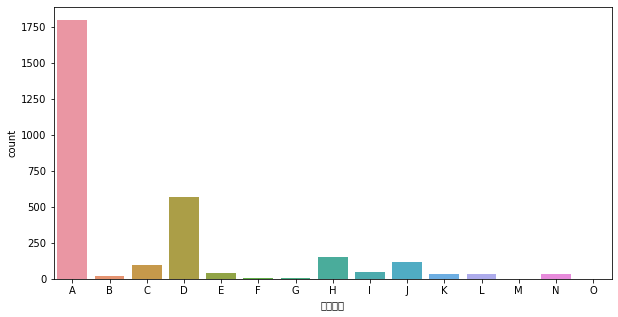

In [32]:
for i in ['단지코드','임대건물구분', '지역', '공급유형','자격유형']:
    print(i)
    print(data[i].value_counts().sort_index())
    plt.figure(figsize=(10,5))
    sns.countplot(i, data =data)
    plt.show()

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2371 non-null   float64
 10  임대료                           2362 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [60]:
data.임대보증금 = data.임대보증금.replace("-","NaN")
data.임대보증금 = data.임대보증금.astype("float64")

data.임대료 = data.임대료.replace("-","NaN")
data.임대료 = data.임대료.astype("float64")

총세대수


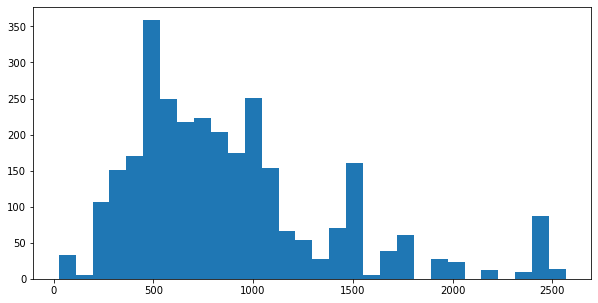

전용면적


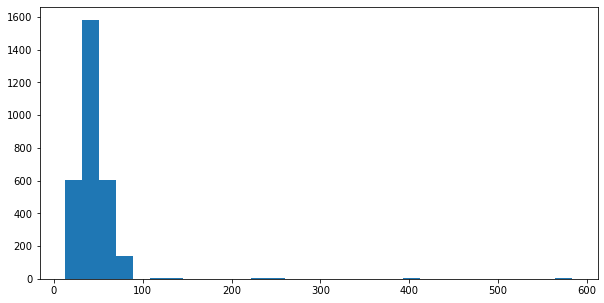

전용면적별세대수


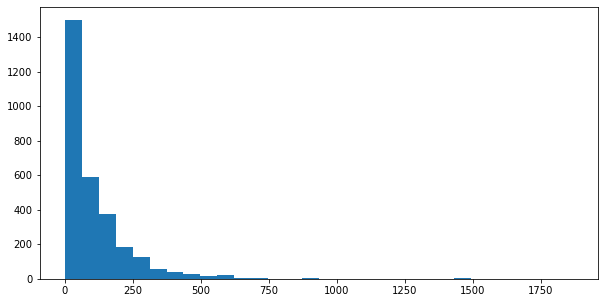

공가수


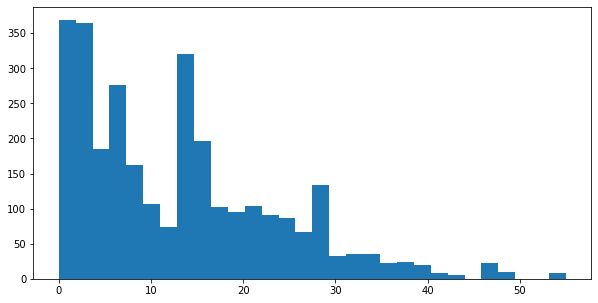

임대료


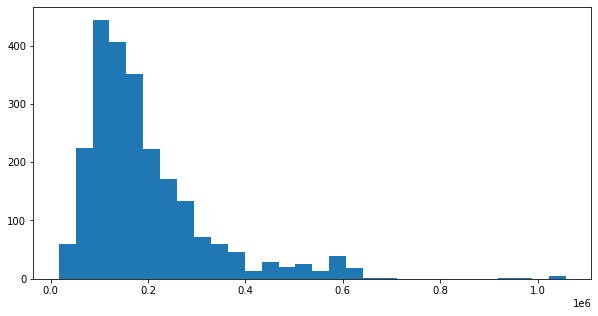

임대보증금


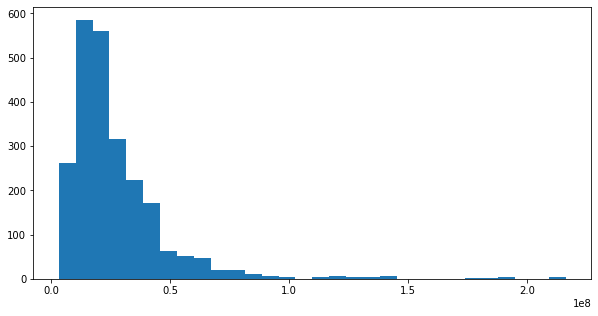

도보 10분거리 내 지하철역 수(환승노선 수 반영)


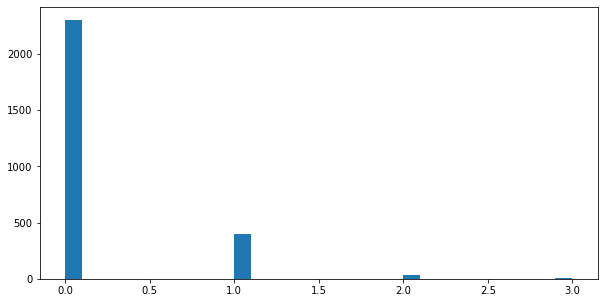

도보 10분거리 내 버스정류장 수


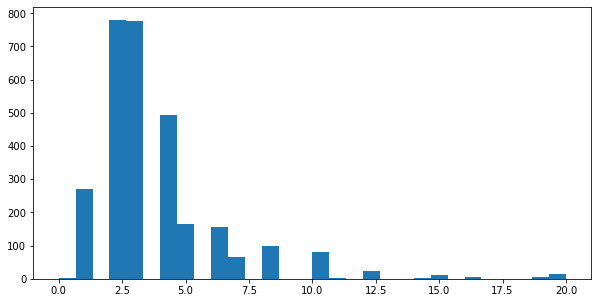

단지내주차면수


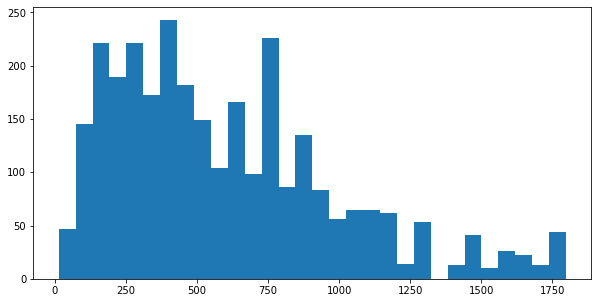

In [62]:
for i in ['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대료', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수']:
    print(i)
    plt.figure(figsize=(10,5))
    plt.hist(i, data =data,bins= 30)
    plt.show()

In [ ]:
'총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수'

In [24]:
data.shape

(2952, 15)

### 종속변수

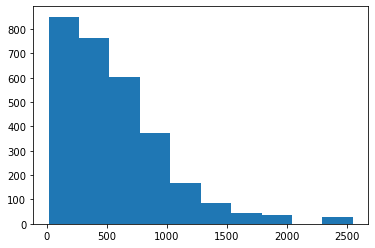

In [31]:
#data.등록차량수.hist()
plt.hist(data.등록차량수)
plt.show()